<a href="https://colab.research.google.com/github/jhuarancca/DSRP-DataArchitect/blob/main/DiagramAsCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Instalamos la librería Diagrams
# Fuente: https://diagrams.mingrammer.com/
!pip install diagrams

In [13]:
# Importamos el módulo maestro Diagram
from diagrams import Diagram

# Vendor AWS
from diagrams.aws.compute import EC2
# Vendor Azure
from diagrams.azure.storage import BlobStorage
# Vendor Google
from diagrams.gcp.analytics import BigQuery

 Diagrama Hola Mundo' size too small for label
 Diagrama Hola Mundo' size too small for label


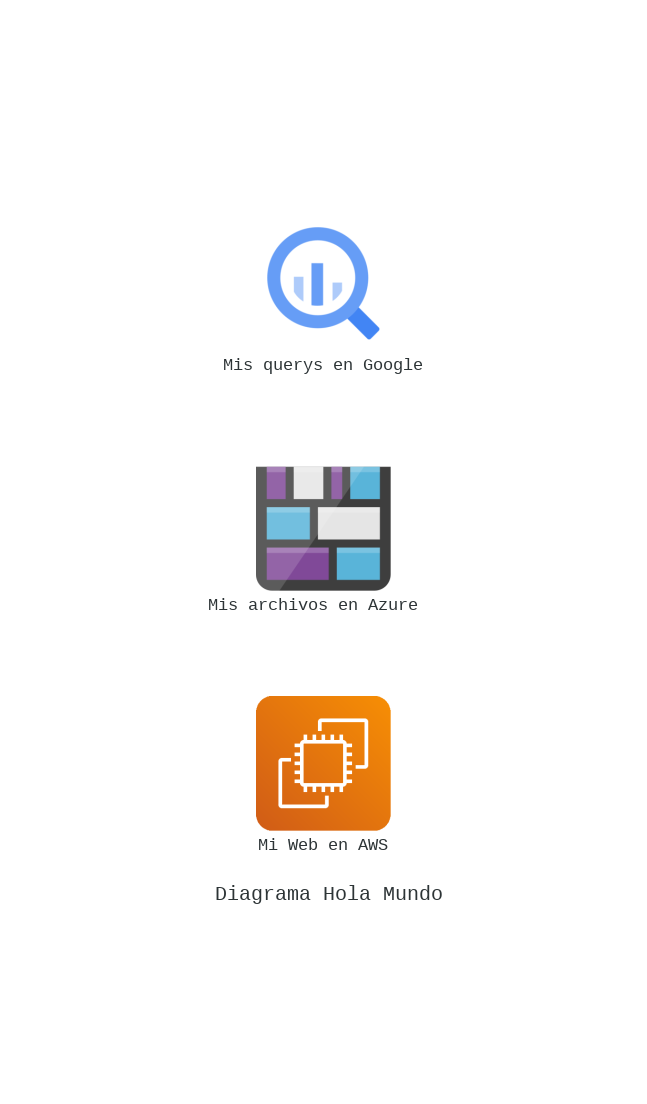

In [14]:
# Diagramando
with Diagram("\n Diagrama Hola Mundo") as miDiagrama:
  EC2("Mi Web en AWS")
  BlobStorage("Mis archivos en Azure  ")
  BigQuery("Mis querys en Google")
miDiagrama

 Diagrama Hola Mundo' size too small for label
 Diagrama Hola Mundo' size too small for label
 Diagrama Hola Mundo' size too small for label


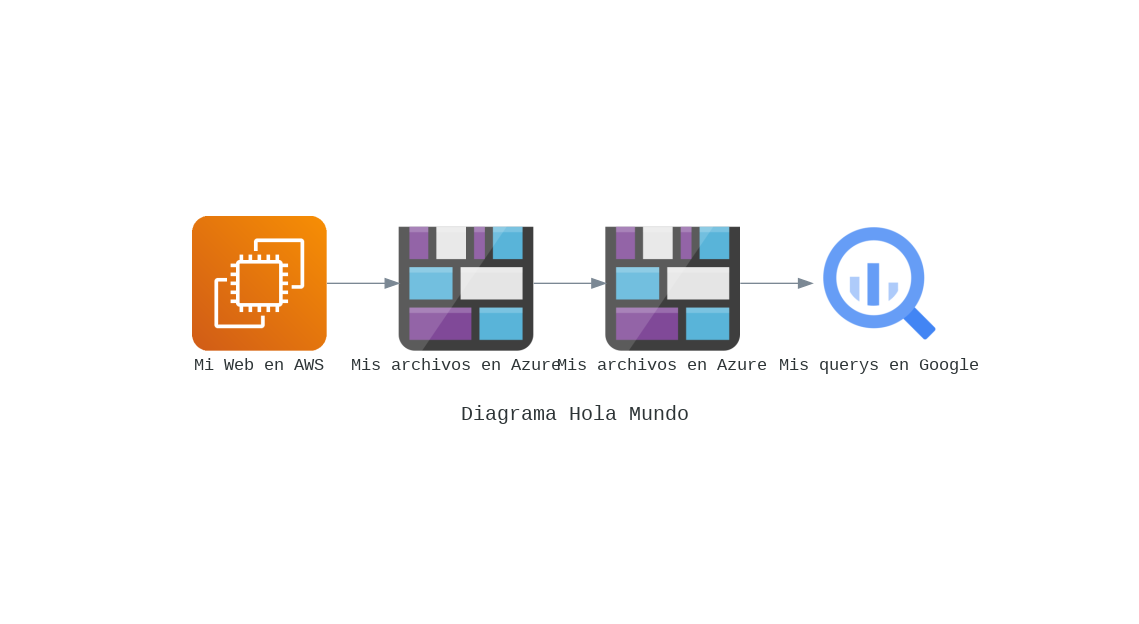

In [15]:
# Diagramando
with Diagram("\n Diagrama Hola Mundo") as miDiagrama:
  source = EC2("Mi Web en AWS")
  storage1 = BlobStorage("Mis archivos en Azure  ")
  storage2 = BlobStorage("Mis archivos en Azure  ")
  query = BigQuery("Mis querys en Google")
  source >> storage1 >> storage2 >> query
miDiagrama

 Arquitectura de Datos con Azure' size too small for label


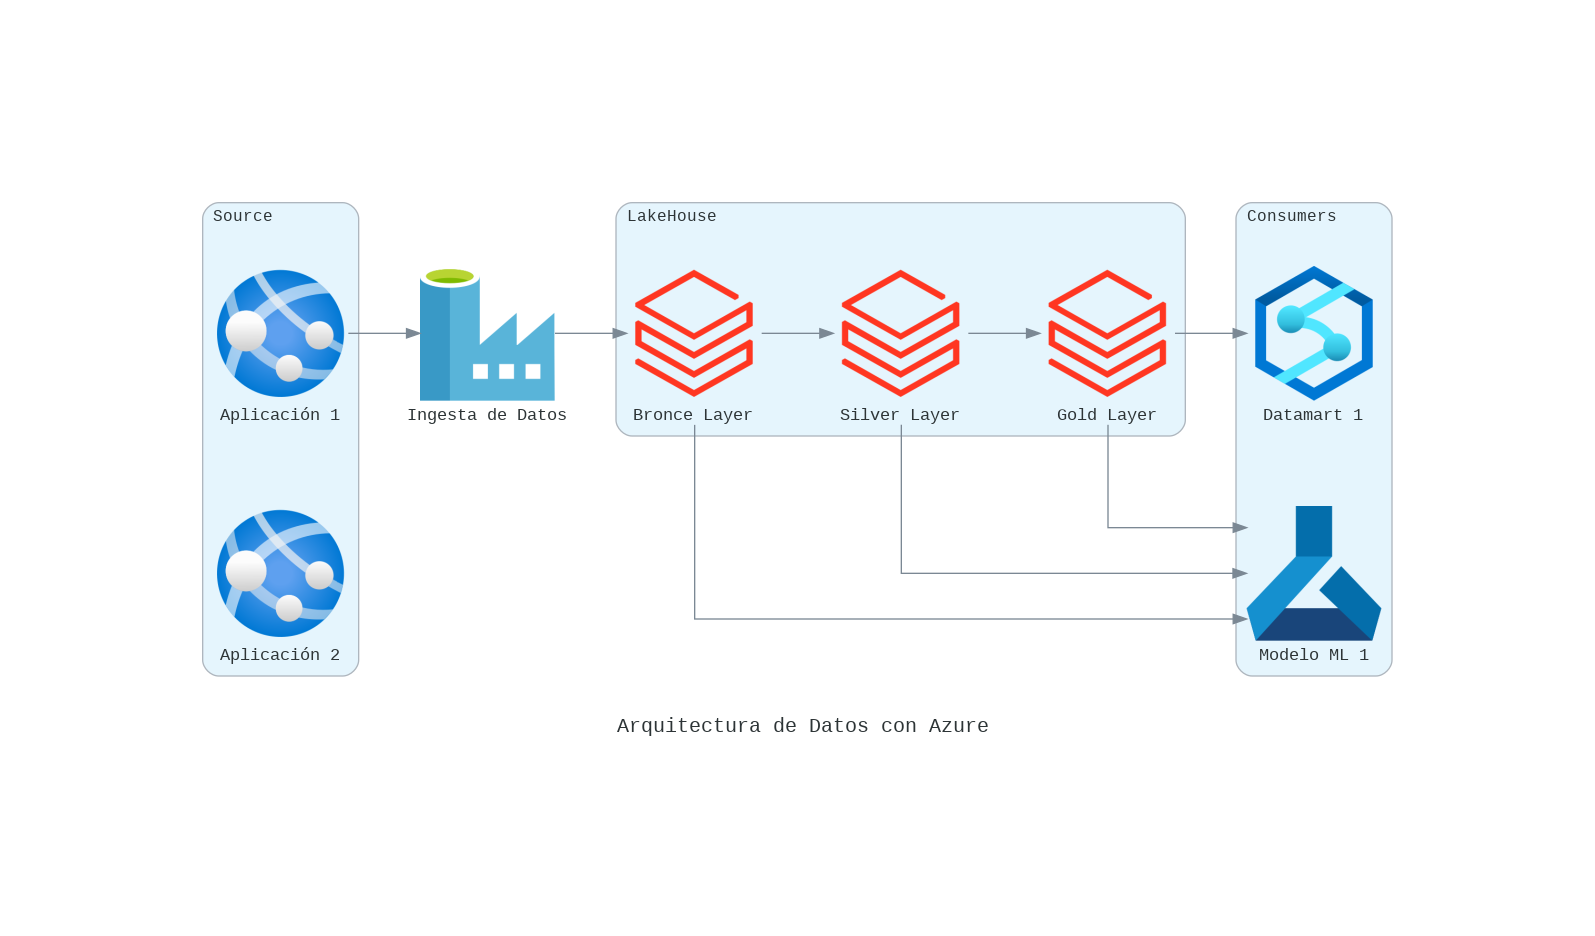

In [16]:
# Importamos los recursos del Cloud Azure
# Fuente: https://diagrams.mingrammer.com/docs/nodes/azure

from diagrams import Diagram, Cluster
from diagrams.azure.compute import AppServices
from diagrams.azure.compute import FunctionApps
from diagrams.azure.storage import BlobStorage
from diagrams.azure.analytics import AnalysisServices
from diagrams.azure.analytics import Databricks
from diagrams.azure.analytics import DataFactories
from diagrams.azure.analytics import SynapseAnalytics
from diagrams.azure.ml import MachineLearningServiceWorkspaces


with Diagram("\n Arquitectura de Datos con Azure") as diag:
  with Cluster("Source"):
    app = AppServices("Aplicación 1")
    AppServices("Aplicación 2")

  ETL = DataFactories ("Ingesta de Datos")
  with Cluster("LakeHouse"):
    bronceLayer = Databricks("Bronce Layer")
    silverLayer = Databricks("Silver Layer")
    goldLayer = Databricks("Gold Layer")

    bronceLayer >> silverLayer >> goldLayer


  with Cluster ("Consumers"):
    dataMart = SynapseAnalytics("Datamart 1")
    ML = MachineLearningServiceWorkspaces("Modelo ML 1")
    consumers = [dataMart, ML]

  app >> ETL >> bronceLayer
  goldLayer >> dataMart
  bronceLayer >> ML
  silverLayer >> ML
  goldLayer >> ML


diag


 Arquitectura de Datos con AWS' size too small for label


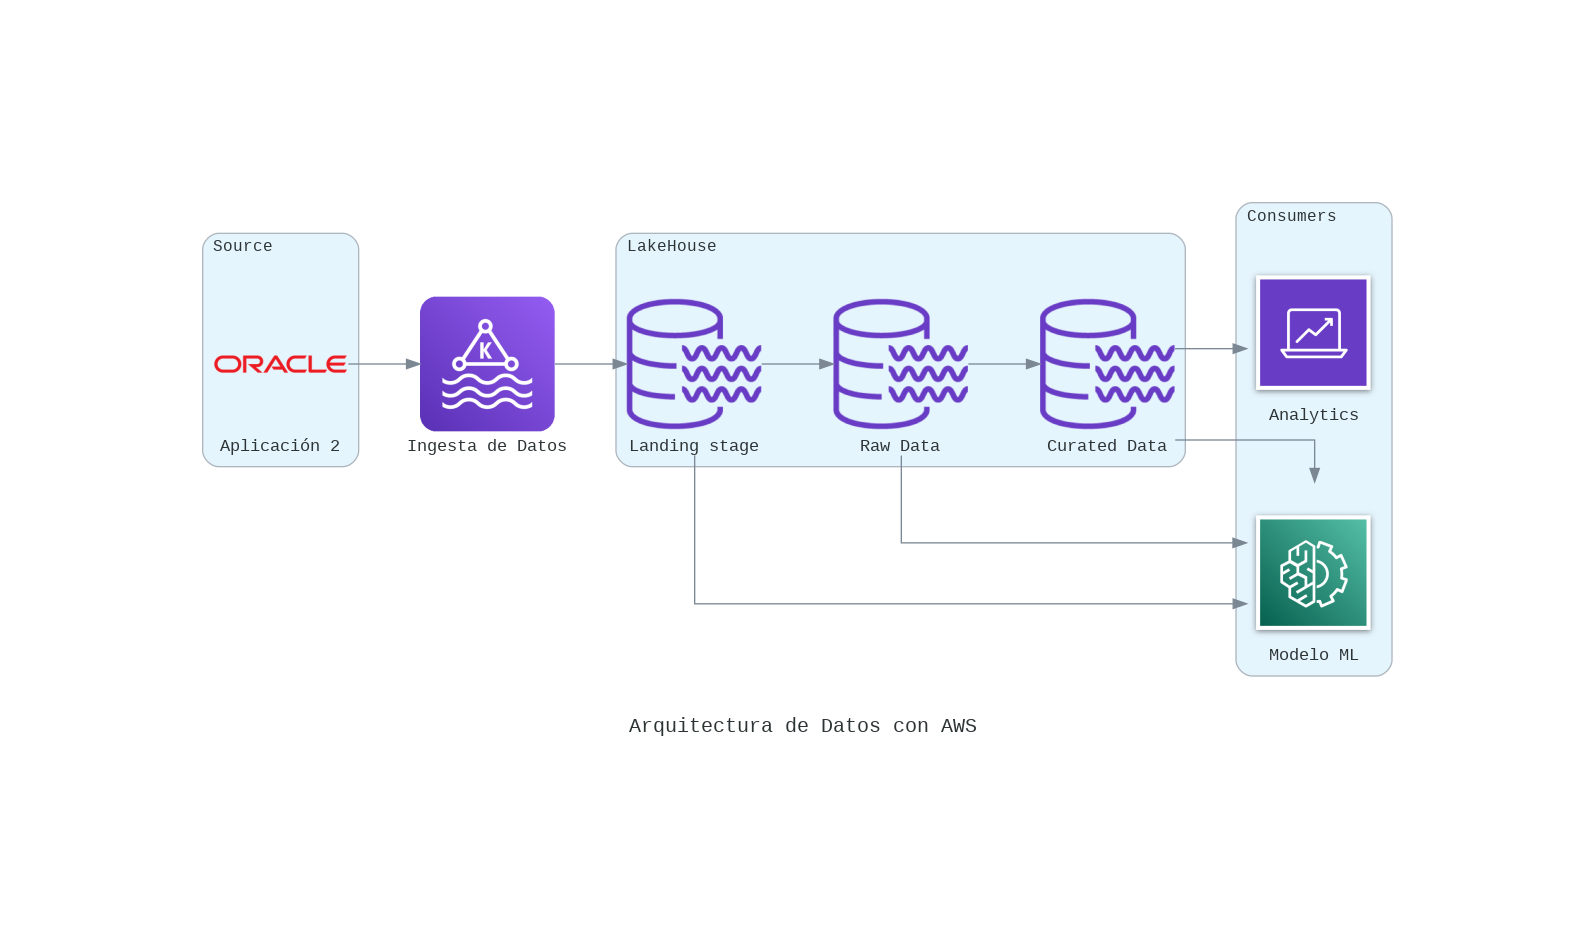

In [29]:
# Importamos los recursos del Cloud Azure
# Fuente: https://diagrams.mingrammer.com/docs/nodes/azure

from diagrams import Diagram, Cluster
from diagrams.onprem.database import Oracle
from diagrams.aws.analytics import ManagedStreamingForKafka
from diagrams.aws.analytics import DataLakeResource
from diagrams.aws.ml import MachineLearning
from diagrams.aws.analytics import Analytics



from diagrams.azure.compute import AppServices
from diagrams.azure.compute import FunctionApps
from diagrams.azure.storage import BlobStorage
from diagrams.azure.analytics import AnalysisServices
from diagrams.azure.analytics import Databricks
from diagrams.azure.analytics import DataFactories
from diagrams.azure.analytics import SynapseAnalytics
from diagrams.azure.ml import MachineLearningServiceWorkspaces


with Diagram("\n Arquitectura de Datos con AWS") as diag:
  with Cluster("Source"):
    app=Oracle("Aplicación 2")

  ETL = ManagedStreamingForKafka("Ingesta de Datos")

  with Cluster("LakeHouse"):
    landData = DataLakeResource("Landing stage")
    rawData = DataLakeResource("Raw Data")
    curatedData = DataLakeResource("Curated Data")

    landData >> rawData >> curatedData


  with Cluster ("Consumers"):
    dataMart = Analytics("Analytics")
    ML = MachineLearning("Modelo ML")
    consumers = [dataMart, ML]

  app >> ETL >> landData
  curatedData >> dataMart
  landData >> ML
  rawData >> ML
  curatedData >> ML


diag
